# Linear Regression in Python

## Table of Content 

- [Imports](#imports)
- [Normal Equation](#normal-equation)
- [Scikit-Learn Class](#scikit-learn-class)
- [Gradient Descent](#gradient-descent)
    - [Batch Gradient Descent](#batch-gradient-descent)
    - [Stochastic Gradient Descent](#stochastic-gradient-descent)
    - [Mini-batch Gradient Descent](#mini-batch-gradient-descent)

## Imports <a class="anchor" id="imports"></a>

In [1]:
# Interactive shell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Imports
import numpy as np

# Set random seed
np.random.seed(17)

# Generate random data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

* The function `np.random.rand(d0, d1, ..., dn)` takes a tuple (m, n) (where m is the number of rows, and n is the number of columns) to specify the size of the output and creates an array of the given shape, populating it with random samples from a uniform distribution over $[0, 1)$. It is a wrapper function around `random_sample()`.

* The function `np.random.randn(d0, d1, ..., dn)` also takes a tuple; it is a wrapper around `standard_normal(size)`, which draws samples from a standard Normal distribution (mean=0, stdev=1). 

In [2]:
# Shape
X.shape

(100, 1)

In [3]:
# Examine
X[0:9]
y[0:9]

array([[0.58933001],
       [1.06117351],
       [0.38304157],
       [0.13580072],
       [1.57397092],
       [1.31266704],
       [1.27504179],
       [1.15120579],
       [0.07812583]])

array([[5.22701012],
       [8.70793778],
       [6.35750985],
       [4.45867943],
       [8.29528155],
       [8.74594136],
       [7.88240514],
       [6.41344579],
       [5.16852558]])

We can draw a scatter plot as follows:

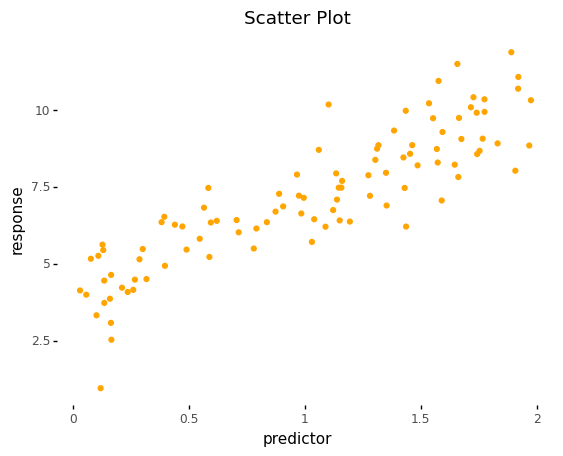

<ggplot: (312070732)>

In [4]:
# Import
import pandas as pd
from plotnine import (
    ggplot,
    geom_point,
    aes,
    geom_smooth,
    theme,
    element_blank,
    element_rect,
    labs,
)

# Scatter plot
(
    ggplot(
        data=pd.DataFrame(
            np.concatenate([y, X], axis=1), columns=["response", "predictor"]
        ),
        mapping=aes(x="predictor", y="response"),
    )
    + geom_point(color="orange")
    + labs(title="Scatter Plot")
    + theme(panel_grid=element_blank(), panel_background=element_rect(fill="white"))
)

## Normal Equation <a class="anchor" id="normal-equation"></a>

We can compute the vector of estimated coefficients using the normal equation:

In [5]:
# Concatenate a column of 1's to the vector of feature values X
X_b = np.concatenate([np.ones(shape=(100, 1)), X], axis=1)
# Another method is to use the short hand
X_b = np.c_[np.ones(shape=(100, 1)), X]
X_b[0:9]

array([[1.        , 0.58933001],
       [1.        , 1.06117351],
       [1.        , 0.38304157],
       [1.        , 0.13580072],
       [1.        , 1.57397092],
       [1.        , 1.31266704],
       [1.        , 1.27504179],
       [1.        , 1.15120579],
       [1.        , 0.07812583]])

In [6]:
# Solve the linear system
theta_normal = np.linalg.inv(a=X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_normal

array([[3.89053611],
       [3.21724034]])

* The function `np.linalg.inv(a)` is from the `linalg` module, which computes the (multiplicative) inverse of a matrix. Given a square matrix $a$, this function returns the matrix $a^{-1}$ satisfying `dot(a, ainv)` = `dot(ainv, a)` = `eye(a.shape[0])`

To make predictions:

In [7]:
# New values of X
X_new = np.array([[0], [2]])
# Add intercept columns of 1's
X_new_b = np.c_[np.ones(shape=(2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

Next, we can compute the matrix product of the design matrix and the vector of estimated coefficients: 

In [8]:
# Predict using the
y_predict = X_new_b.dot(theta_normal)
y_predict

array([[ 3.89053611],
       [10.3250168 ]])

Finally, we can plot the estimated regression line:

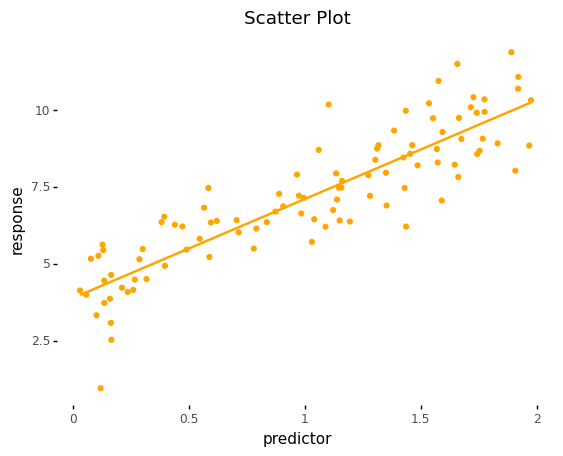

<ggplot: (277204806)>

In [9]:
# Scatter plot with estimated regression function
(
    ggplot(
        data=pd.DataFrame(
            np.concatenate([y, X], axis=1), columns=["response", "predictor"]
        ),
        mapping=aes(x="predictor", y="response"),
    )
    + geom_point(color="orange")
    + geom_smooth(method="lm", se=False, color="orange")
    + labs(title="Scatter Plot")
    + theme(panel_grid=element_blank(), panel_background=element_rect(fill="white"))
)

## Scikit-Learn Class <a class="anchor" id="scikit-learn-class"></a>

Scikit-Learn has a `LinearRegression` class that makes fitting linear models easy:

In [11]:
# Import
from sklearn.linear_model import LinearRegression

# Class constructor
lin_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
# Fit
lin_reg.fit(X, y)
# Retreive attributes of the class
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([3.89053611]), array([[3.21724034]]))

* The class constructor has the following arguments:
    - **fit_intercept**, bool, default=True. Whether to calculate the intercept for this model. If set to False, no intercept 
    will be used in calculations (i.e. data is expected to be centered).
    - **copy_X**, bool, default=True. If True, X will be copied; else, it may be overwritten.
    - **n_jobs**, int, default=None. The number of jobs to use for the computation, providing speedup only for n_targets > 1 
    and sufficiently large problems. None means 1 unless in a `joblib.parallel_backend` context. On the other hand, -1 means 
    using all processors.
    - **positive**, bool, default=False. When set to True, forces the coefficients to be positive. This option is only
    supported for dense arrays.



* The class has the following attributes:
    - **coef_**, array of shape (n_features, ) or (n_targets, n_features). Estimated coefficients for the linear regression 
    problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while 
    if only one target is passed, this is a 1D array of length n_features.
    - **rank_int**, rank of matrix X. Only available when X is dense.
    - **singular_**, array of shape (min(X, y),). Singular values of X. Only available when X is dense.
    - **intercept_**, float or array of shape (n_targets,). Independent term in the linear model. Set to 0.0 if fit_intercept 
    = False.
    - **n_features_in_**, int, number of features seen during fit.
    - **feature_names_in_**, ndarray of shape (n_features_in_,). Names of features seen during fit. Defined only when X has
    feature names that are all strings.


* Next, the fit method has the following arguments:
    - **X**, {array-like, sparse matrix} of shape (n_samples, n_features). Training data. Note that n_features does not include the column of 1's. 
    - **y**, array-like of shape (n_samples,) or (n_samples, n_targets). Target values. Will be cast to X’s `dtype` if necessary. If `n_targets` > 1, then the least-squares solution is calculated for each of the n target or response vectors.
    - **sample_weight**, array-like of shape (n_samples, ), default=None. Individual weights for each sample.

The class `LinearRegression` is based on the function `scipy.linalg.lstsq()` (the name stands for “least squares”), which we could call directly:

In [12]:
# Multiple assignment, tuple unpacking, and iterable unpacking
theta_svd, residuals, rank, s = np.linalg.lstsq(a=X_b, b=y, rcond=1e-6)
# Estimated coefficients
theta_svd

array([[3.89053611],
       [3.21724034]])

In [13]:
# Residual sum of square
residuals

array([103.34087726])

In [14]:
# Rank of matrix X_b
rank

2

In [15]:
# Singular values of X_b
s

array([14.95593301,  3.96857703])

* The function has two importat arguments:
    - **a(M, N)**, array_like, which is the “coefficient” matrix.
    - **b{(M,), (M, K)}**, array_like, ordinate or “dependent variable” values. If b is two-dimensional, the least-squares 
    solution is calculated for each of the K columns of b.
    
This function computes $\hat{\theta}=X^{+}y$, where $X^{+}$ is the pseudoinverse of $X$ (specifically, the Moore-Penrose inverse). We can also compute the pseudoinverse directly:

In [16]:
np.linalg.pinv(a=X_b, rcond=1e-15, hermitian=False).dot(y)

array([[3.89053611],
       [3.21724034]])

The pseudoinverse itself is computed using a standard matrix factorization technique called **Singular Value Decomposition** (SVD) that can decompose the training set matrix $\mathbf{X}$ into the matrix multiplication of three matrices $\mathbf{U} \boldsymbol{\Sigma} \mathbf{V}^{\top}$. The pseudoinverse is computed as $\mathbf{X}^{+}=\mathbf{V} \boldsymbol{\Sigma}^{+} \mathbf{U}^{\top}$. To compute the matrix $\boldsymbol{\Sigma}^{+}$, the algorithm takes $\boldsymbol{\Sigma}$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $\mathbf{X}^{\top} \mathbf{X}$ is not invertible (i.e., singular), such as if $m<n$ or if some features are redundant, but the pseudoinverse is alwavs defined.

## Gradient Descent <a class="anchor" id="gradient-descent"></a>

### Batch Gradient Descent <a class="anchor" id="batch-gradient-descent"></a>

In [17]:
# Learning rate
eta = 0.1
# Iterations
n_iterations = 1000
# Number of instances or trials
m = len(X_b)

# Randome initialization for vector of parameters
theta = np.random.randn(2, 1)
# For loop
# During each iteration, compute gradient vector and decrease the vector of parameters by (learning rate * gradient vector)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

The results should be similar to we we obtained using the normal equation and the scikit-learn `LinearRegression` class:

In [18]:
# Gradient descent estimators
theta
# SVD
theta_svd
# Normal equation
theta_normal

array([[3.89053611],
       [3.21724034]])

array([[3.89053611],
       [3.21724034]])

array([[3.89053611],
       [3.21724034]])

As can be seen, the three algorithms yielded the same estimators for the model parameters.

### Stochastic Gradient Descent <a class="anchor" id="stochastic-gradient-descent"></a>

The following code implements stochastic gradient descent. By convention, we iterate by rounds of $m$ iterations; each round is called an epoch.

In [40]:
# Instantiate container for theta
theta_path_sgd = []
# Initialize number of instances or trials
# Number of iterations per round (epoch)
m = len(X_b)
# Set seed
np.random.seed(12)
# Number of epochs (rounds)
# Therefore, we have 50 * 100 = 5000 iterations
n_epochs = 50
# Learning schedule hyperparameters
t0, t1 = 5, 50
# Random initialization
theta_sgd = np.random.randn(2, 1)


# Function for determining learning rate
# As t increases, the function decreases, and so the learning rate is reduced
def learning_schedule(t):
    return t0 / (t + t1)


# For loop
for epoch in range(n_epochs):
    for i in range(m):
        # Generate random integer to select random instance or trial
        random_index = np.random.randint(low=m)
        # Randomly select a random instance k
        # This is a return (p x 1) row vector
        x_k = X_b[random_index : random_index + 1]
        # This is single cell scalar value
        y_k = y[random_index : random_index + 1]
        # Compute gradient vector at the random initialization
        gradients = 2 * x_k.T.dot(x_k.dot(theta_sgd) - y_k)
        # Compute learning rate at each iteration
        eta = learning_schedule(epoch * m + i)
        # Decrease the current parameter vector by (learning rate * gradient vector)
        theta_sgd = theta_sgd - eta * gradients
        # Append each step to the list container
        theta_path_sgd.append(theta_sgd)

The results are similar to the solutions given by the previous algorithms, however, they are not optimal:

In [42]:
# Stochastic gradient descent
theta_sgd
# Normal equation
theta_normal

array([[3.88860116],
       [3.1726592 ]])

array([[3.89053611],
       [3.21724034]])

We may also examine the first 10 steps of the process. Evidently, the algorithm bounces around quite a bit and only moves towards the global minimum on average: 

In [43]:
theta_path_sgd[0:9]

[array([[ 1.70209352],
        [-0.21062653]]),
 array([[ 2.24820904],
        [-0.13646366]]),
 array([[3.82180696],
        [2.2811821 ]]),
 array([[4.26591981],
        [3.04374577]]),
 array([[4.40277306],
        [3.25640876]]),
 array([[4.25174182],
        [3.13677769]]),
 array([[4.17167453],
        [3.00258629]]),
 array([[3.99348995],
        [2.86346885]]),
 array([[4.1648124 ],
        [3.08835819]])]

When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If we do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum. Scikit-Learn has a class `SGDRegressor` that implements stochastic gradient descent, and there is an argument for shuffling the instances:

In [44]:
# Import
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline (class constructor)
# This allow us to add in a step to scale the input by supplying a tuple ('standardscalar', StandardScaler())
sgd_reg = Pipeline(
    steps=[
        (
            "sgdregressor",
            SGDRegressor(
                penalty=None,
                fit_intercept=True,
                max_iter=1000,
                tol=1e-3,
                shuffle=True,
                random_state=17,
                eta0=0.1,
            ),
        )
    ]
)
# Fit
sgd_reg.fit(X, y.ravel())

Pipeline(steps=[('sgdregressor',
                 SGDRegressor(eta0=0.1, penalty=None, random_state=17))])

In [45]:
# Stochastic gradient descent
np.c_[sgd_reg["sgdregressor"].intercept_, sgd_reg["sgdregressor"].coef_].T
# Normal equation
theta_normal

array([[3.91459713],
       [3.2848763 ]])

array([[3.89053611],
       [3.21724034]])

### Mini-batch Gradient Descent <a class="anchor" id="mini-batch-gradient-descent"></a>

The last algorithm is called Mini-batch gradient descent:

In [48]:
# Instantiate path container
theta_path_mgd = []
# Number of iterations
n_iterations = 50
# Number of instances or trials per batch
minibatch_size = 20
# Number of instances or trials
m = len(X_b)
# Set seed
np.random.seed(12)
# Random initialization
theta_mini_gd = np.random.randn(2, 1)
# Initialize learning schedule hyperparameters
t0, t1 = 200, 1000
# Initialize learning schedule input
t = 0
# For loop
for epoch in range(n_iterations):
    # Shuffle to permute the indices (e.g. (2, 77, 23, 100, ..., 31, 46) with length = m )
    # This also ensure that each iteration reshuffles the instances
    shuffled_indices = np.random.permutation(m)
    # Select instances in the shuffled order given by 'shuffled_indices,' which essentially shuffles the rows of the design matrix
    X_b_shuffled = X_b[shuffled_indices]
    # Select the labels or response values
    y_shuffled = y[shuffled_indices]
    # For each of the n_iterations, randomly select a batch of 'minibatch_size' to compute the gradient vector
    # Range(start, stop, step)
    for i in range(0, m, minibatch_size):
        # Increase the learning schedule input by one each time a random mini-batch is selected
        t += 1
        # Select the batches and responses
        x_batch = X_b_shuffled[i : i + minibatch_size]
        y_batch = y_shuffled[i : i + minibatch_size]
        # Compute gradient vector on the mini-batch
        gradients = (
            2 / minibatch_size * x_batch.T.dot(x_batch.dot(theta_mini_gd) - y_batch)
        )
        # Compute learning rate
        eta = learning_schedule(t)
        # Decrease current parameter vector by  (learning rate * gradient vector)
        theta_mini_gd = theta_mini_gd - eta * gradients
        # Record theta vector during each iteration
        theta_path_mgd.append(theta_mini_gd)

The values are again close but not optimal:

In [49]:
# Mini-batch
theta_mini_gd
# Stochastic
np.c_[sgd_reg["sgdregressor"].intercept_, sgd_reg["sgdregressor"].coef_].T
# Normal equation
theta_normal

array([[3.91420073],
       [3.22240447]])

array([[3.91459713],
       [3.2848763 ]])

array([[3.89053611],
       [3.21724034]])